# Brownian Motion 


In mathematics, Brownian motion is described by the Wiener process, a continuous-time stochastic process named in honor of Norbert Wiener. It is one of the best known Lévy processes (stochastic processes with stationary independent increments) and occurs frequently in pure and applied mathematics, economics and physics.


A single realisation of three-dimensional Brownian motion for times $0 \leq t \leq 2$
The Wiener process $W_{t}$ is characterized by four facts:

$W0 = 0$
$W_{t}$ is almost surely continuous
$W_{t}$ has independent increments

$$W_{t}-W_{s}\sim {\mathcal {N}}(0,t-s)$$ (for 

$$0\leq s\leq t).$$

$${\mathcal {N}}(\mu ,\sigma ^{2})$$ denotes the normal distribution with expected value μ and variance σ2. The condition that it has independent increments means that if 

$0\leq s_{1}<t_{1}\leq s_{2}<t_{2}$ then 

$$W_{t_{1}}-W_{s_{1}}$$ and 

$$W_{t_{2}}-W_{s_{2}}$$ are independent random variables.

An alternative characterisation of the Wiener process is the so-called Lévy characterisation that says that the Wiener process is an almost surely continuous martingale with W0 = 0 and quadratic variation 

$$[W_{t},W_{t}]=t.$$

A third characterisation is that the Wiener process has a spectral representation as a sine series whose coefficients are independent 

$${\mathcal {N}}(0,1)$$ random variables.

In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
T = 1
N = 501
dt = T/(N-1)

In [24]:
X = [0] * N
dX = [0] * N

In [25]:
np.random.seed(123)
dX[0] = np.sqrt(dt) * np.random.randn()

In [26]:
X[0] = dX[0]

In [27]:
np.random.seed(1234)
for j in range(1, N):
    dX[j] = np.sqrt(dt) * np.random.randn()
    X[j] = X[j-1] + dX[j]

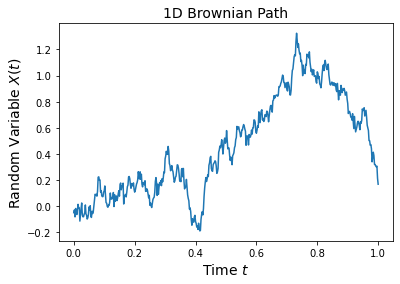

In [29]:
t = np.linspace(0,T,N)
plt.plot(t, X)
plt.xlabel('Time $t$', fontsize=14)
plt.ylabel('Random Variable $X(t)$', fontsize=14)
plt.title('1D Brownian Path', fontsize=14)
plt.show()

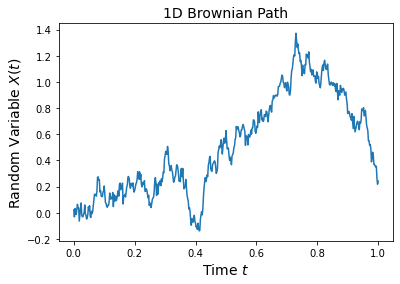

In [30]:
np.random.seed(1234)
dX = np.sqrt(dt) * np.random.randn(1,N)
X = np.cumsum(dX, axis=1)


plt.plot(t, X[0,:])
plt.xlabel('Time $t$', fontsize=14)
plt.ylabel('Random Variable $X(t)$', fontsize=14)
plt.title('1D Brownian Path', fontsize=14)
plt.show()

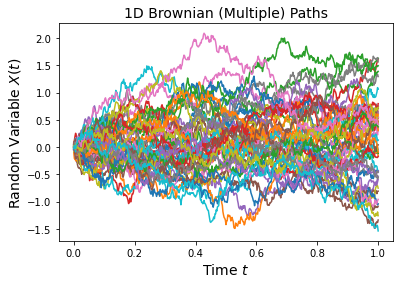

In [31]:
T = 1
N = 501 # Number of points, number of subintervals = N-1
dt = T/(N-1) # Time step
t = np.linspace(0,T,N)
M = 50 # Number of walkers/paths

dX = np.sqrt(dt) * np.random.randn(M, N)
X = np.cumsum(dX, axis=1)


for i in range(M):
    plt.plot(t, X[i,:])
  
    
plt.xlabel('Time $t$', fontsize=14)
plt.ylabel('Random Variable $X(t)$', fontsize=14)
plt.title('1D Brownian (Multiple) Paths', fontsize=14)
plt.show()

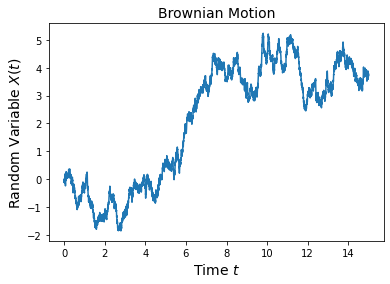

In [33]:
np.random.seed(123)

def bm(t,n):
    x = np.random.normal(0,np.sqrt(t/n),n)
    return(np.cumsum(x))
t = 15
n = 10000
T =  np.arange(0,15,t/n)
    
plt.xlabel('Time $t$', fontsize=14)
plt.ylabel('Random Variable $X(t)$', fontsize=14)
plt.title('Brownian Motion', fontsize=14)
plt.plot(T,bm(t,n))
plt.show()

# Brownian Bridge

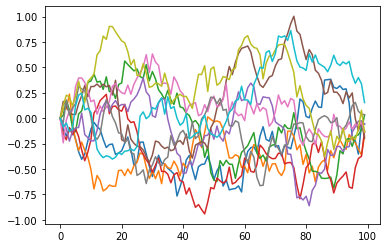

In [20]:
import numpy as np
import six
import matplotlib.pyplot as plt


seed = 0
N = 100
M = 10

np.random.seed(123)


def sample_path_batch(M, N):
    dt = 1.0 / N
    dt_sqrt = np.sqrt(dt)
    B = np.empty((M, N), dtype=np.float32)
    B[:, 0] = 0
    for n in six.moves.range(N - 1):
        t = n * dt
        xi = np.random.normal(0,dt_sqrt,M)
        B[:, n + 1] = B[:, n] * (1 - dt / (1 - t)) + xi
    return B


B = sample_path_batch(M, N)
plt.plot(B.T)
plt.show()